In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [113]:
data = pd.read_csv('train.csv')

In [115]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
## Fill missing 'Age' values with the median age
data['Age'].fillna(data['Age'].median(), inplace= True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_32584\2296668104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace= True)


In [123]:
# Drop the 'Cabin' column as it has too many missing values
data.drop(['Cabin'], axis = 1, inplace =True)

In [125]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [127]:
# Drop rows with missing values in 'Embarked'

data.dropna(subset = ['Embarked'], inplace = True)

In [129]:
#.........................Over Data Cleaning part>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>..#

In [132]:
#.......................Encoding Categorial features.........................................#

In [134]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [136]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [138]:
# Convert 'Embarked' column into numerical format.......................

data = pd.get_dummies(data, columns= ['Embarked'],drop_first =  True)

In [140]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [142]:
#..........................End the Encoding>>>>>>>>>>>.>>>>>>>>>>>>>>>>>...................#

In [145]:
#...............Feature Selection>>>>>............................#

In [149]:
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y  =data['Survived']

In [151]:
#>...............SPliting Dataset..............#

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [155]:
#................................Feature Scaling


In [157]:
scaler = StandardScaler()

In [159]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [161]:
# >>>>>>>>>>>>>>>>>>.............................Train the Logistic Regression Model


In [165]:
model = LogisticRegression()

In [167]:
model.fit(X_train , y_train)

LogisticRegression()

In [169]:
#.....................................Make Predictions.......................

In [171]:
y_predict = model.predict(X_test)

In [173]:
#...................................Evaluate the Model


In [175]:
accuracy = accuracy_score(y_test, y_predict)


In [181]:
print(f'accuracy: {accuracy:.2f}')

accuracy: 0.77


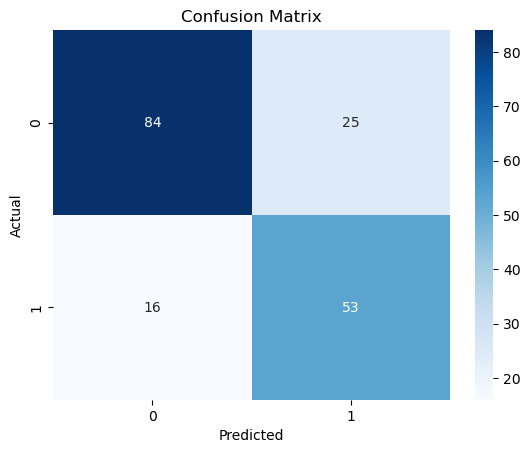

In [187]:
#..........................................# Display confusion matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [189]:
# Display classification report

In [191]:
class_report = classification_report(y_test, y_predict)

In [193]:
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



In [205]:
# Function to predict survival
def predict_survival():
    # Get user input
    pclass = int(input("Enter Pclass (1, 2, or 3): "))
    sex = input("Enter Sex (male or female): ").lower()
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter number of siblings/spouses aboard: "))
    parch = int(input("Enter number of parents/children aboard: "))
    fare = float(input("Enter Fare: "))
    embarked = input("Enter Embarked (C, S, or Q): ").upper()

    # One-hot encode the categorical variables
    sex_male = 1 if sex == 'male' else 0
    embarked_Q = 1 if embarked == 'Q' else 0
    embarked_S = 1 if embarked == 'S' else 0

    # Create a DataFrame for input data
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex_male': [sex_male],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked_Q': [embarked_Q],
        'Embarked_S': [embarked_S]
    })

    # Scale the input features using the same scaler as before
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)

    # Output the prediction
    if prediction[0] == 1:
        print("The passenger is predicted to have survived.")
    else:
        print("The passenger is predicted to not have survived.")


In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('train.csv')

# Data preprocessing
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


X = data[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")



if __name__ == "__main__":
    predict_survival()


C:\Users\Asus\AppData\Local\Temp\ipykernel_32584\2401155013.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_32584\2401155013.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Model accuracy: 0.81


Enter Pclass (1, 2, or 3):  3
Enter Sex (male or female):  male
Enter Age:  22
Enter number of siblings/spouses aboard:  1
Enter number of parents/children aboard:  0
Enter Fare:  15.50
Enter Embarked (C, S, or Q):  S


The passenger is predicted to not have survived.
